In [1]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from deakin.edu.au.data import get_Marine_dataset
from deakin.edu.au import models 
import deakin.edu.au.metrics as metrics
from tensorflow.keras.utils import plot_model
from graphviz import Digraph
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from keras.models import load_model


In [2]:
dataset = get_Marine_dataset(output_level='all',image_size=(64, 64),subtype='Tropical',batch_size=128)

In [3]:
tree = dataset.get_tree()

tree.show()

Root
├── Biota -> (L0_0)
│   ├── Ascidians -> (L1_5)
│   │   └── Ascidians (unstalked) -> (L2_16)
│   │       └── Ascidians (unstalked) -> (L3_18)
│   │           └── Ascidians (unstalked) -> (L4_18)
│   ├── Bryozoa -> (L1_2)
│   │   └── Bryozoan (soft) -> (L2_18)
│   │       └── Bryozoan (soft) -> (L3_20)
│   │           └── Bryozoan (soft) -> (L4_20)
│   ├── Cnidaria -> (L1_1)
│   │   ├── Colonial Anemones, Zoanthids and Corallimorphs -> (L2_19)
│   │   │   └── Colonial Anemones, Zoanthids and Corallimorphs -> (L3_21)
│   │   │       └── Colonial Anemones, Zoanthids and Corallimorphs -> (L4_21)
│   │   ├── Corals -> (L2_28)
│   │   │   ├── Ahermatypic corals -> (L3_30)
│   │   │   │   └── Ahermatypic corals -> (L4_30)
│   │   │   ├── Black & Octocorals -> (L3_32)
│   │   │   │   ├── Heliopora coerulea (blue coral) -> (L4_47)
│   │   │   │   ├── Organ-pipe coral (Tubipora) -> (L4_33)
│   │   │   │   └── Soft corals and gorgonians -> (L4_32)
│   │   │   ├── Hermatypic corals -> (L3_33)

In [7]:
epochs=10
conv_base = 'vgg19'
learning_rate=1e-5

In [8]:
dataset.num_classes

[2, 9, 34, 38, 52]

In [9]:
dataset.image_size

(64, 64, 3)

In [10]:
# Create the model
mout_model = models.get_mout_model(dataset.num_classes,
                                   dataset.image_size,
                                   conv_base=conv_base,
                                   learning_rate=learning_rate)
mout_model.summary()
#train model
history_mout_model = mout_model.fit(dataset.train_dataset,
                                    validation_data=dataset.val_dataset,
                                    epochs=epochs)

Model: "mout_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten (Flatten)               (None, 2048)         0           vgg19[0][0]                      
__________________________________________________________________________________________________
out_level_0 (Dense)             (None, 2)            4098        flatten[0][0]                    
_________________________________________________________________________________________

244/244 [==============================] - 88s 360ms/step - loss: 1.1458 - out_level_0_loss: 0.2926 - out_level_1_loss: 0.7074 - out_level_2_loss: 1.4171 - out_level_3_loss: 1.5437 - out_level_4_loss: 1.7680 - out_level_0_accuracy: 0.8783 - out_level_1_accuracy: 0.7343 - out_level_2_accuracy: 0.5816 - out_level_3_accuracy: 0.5386 - out_level_4_accuracy: 0.5064 - val_loss: 1.3565 - val_out_level_0_loss: 0.3509 - val_out_level_1_loss: 0.8738 - val_out_level_2_loss: 1.6676 - val_out_level_3_loss: 1.8342 - val_out_level_4_loss: 2.0560 - val_out_level_0_accuracy: 0.8527 - val_out_level_1_accuracy: 0.6708 - val_out_level_2_accuracy: 0.5066 - val_out_level_3_accuracy: 0.4581 - val_out_level_4_accuracy: 0.4333
Epoch 10/10
244/244 [==============================] - 87s 358ms/step - loss: 1.0997 - out_level_0_loss: 0.2780 - out_level_1_loss: 0.6749 - out_level_2_loss: 1.3618 - out_level_3_loss: 1.4829 - out_level_4_loss: 1.7008 - out_level_0_accuracy: 0.8846 - out_level_1_accuracy: 0.7491 - out_

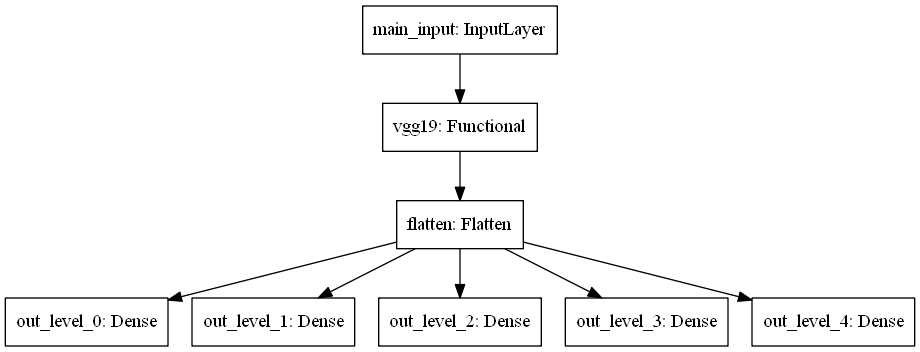

In [16]:
plot_model(mout_model)

In [11]:
models = [mout_model]

predictions = []

for model in models:
    print('Prediction using: ', model.name)
    predictions.append((metrics.predict_from_pipeline(model, dataset.test_dataset)))


exact_match_scores = [metrics.get_exact_match(x[0], x[1]) for x in predictions]
hP_scores = [metrics.get_hierarchical_metrics(x[0], x[1], dataset.get_tree())[0] for x in predictions]
hR_scores = [metrics.get_hierarchical_metrics(x[0], x[1], dataset.get_tree())[1] for x in predictions]
hF1_scores = [metrics.get_hierarchical_metrics(x[0], x[1], dataset.get_tree())[2] for x in predictions]
h_accuracy_scores = [metrics.get_h_accuracy(x[0], x[1]) for x in predictions]
h_accuracy_scores_k2 = [metrics.get_h_accuracy(x[0], x[1], k=2) for x in predictions]
h_accuracy_scores_k5 = [metrics.get_h_accuracy(x[0], x[1], k=5) for x in predictions]
m_accuracy_scores = [metrics.get_m_accuracy(x[0], x[1]) for x in predictions]
m_accuracy_scores_k2 = [metrics.get_m_accuracy(x[0], x[1], k=2) for x in predictions]
m_accuracy_scores_k5 = [metrics.get_m_accuracy(x[0], x[1], k=5) for x in predictions]
accuracy_scores_L0 = [metrics.get_top_k_taxonomical_accuracy(x[0], x[1])[0] for x in predictions]
accuracy_scores_L1 = [metrics.get_top_k_taxonomical_accuracy(x[0], x[1])[1] for x in predictions]
accuracy_scores_L2 = [metrics.get_top_k_taxonomical_accuracy(x[0], x[1])[2] for x in predictions]
accuracy_scores_L3 = [metrics.get_top_k_taxonomical_accuracy(x[0], x[1])[3] for x in predictions]
accuracy_scores_L4 = [metrics.get_top_k_taxonomical_accuracy(x[0], x[1])[4] for x in predictions]
consistency = [metrics.get_consistency(x[1], dataset.get_tree()) for x in predictions]

Prediction using:  mout_model


In [12]:
#Consistency

consistency

[0.7054813578185866]

In [13]:
#Accuracy L0 , L1, L2, L3, L4

accuracy_scores_L0,accuracy_scores_L1,accuracy_scores_L2,accuracy_scores_L3,accuracy_scores_L4


([0.8533667223149694],
 [0.6624930439621591],
 [0.5102949360044519],
 [0.4574290484140234],
 [0.4301613800779076])